## 두 집단간 차이 검정

In [8]:
import pandas as pd 

seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]
apt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 156 to 10212
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ACC_YEAR        5269 non-null   int64         
 1   SGG_CD          5269 non-null   int64         
 2   SGG_NM          5269 non-null   object        
 3   BJDONG_CD       5269 non-null   int64         
 4   BJDONG_NM       5269 non-null   object        
 5   LAND_GBN        5269 non-null   float64       
 6   LAND_GBN_NM     5269 non-null   object        
 7   BONBEON         5269 non-null   float64       
 8   BUBEON          5269 non-null   float64       
 9   BLDG_NM         5269 non-null   object        
 10  DEAL_YMD        5269 non-null   datetime64[ns]
 11  OBJ_AMT         5269 non-null   int64         
 12  BLDG_AREA       5269 non-null   float64       
 13  TOT_AREA        5269 non-null   float64       
 14  FLOOR           5269 non-null   float64       
 15  R

In [12]:
ttest_df = round(apt_df.groupby('month')['OBJ_AMT'].agg(["mean", "std", "size"]), 1)
ttest_df

,mean,std,size
month,,,
3,97613.7,73359.7,3059
4,98829.8,68137.7,2210


In [26]:
import numpy as np
(97613 - 98829) / np.sqrt((((3059-1) * 73359**2 + (2210-1)*68137**2)/(3059+2210-2))*((1/3059) + (1/2210)))

-0.6116187198938243

In [25]:
from pingouin import ttest
import pandas as pd 

seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]

march_df = apt_df[apt_df['month'] == 3]
april_df = apt_df[apt_df['month'] == 4]

ttest(march_df['OBJ_AMT'], april_df['OBJ_AMT'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.618972,4950.212078,two-sided,0.535963,"[-5067.79, 2635.6]",0.017076,0.038,0.093825


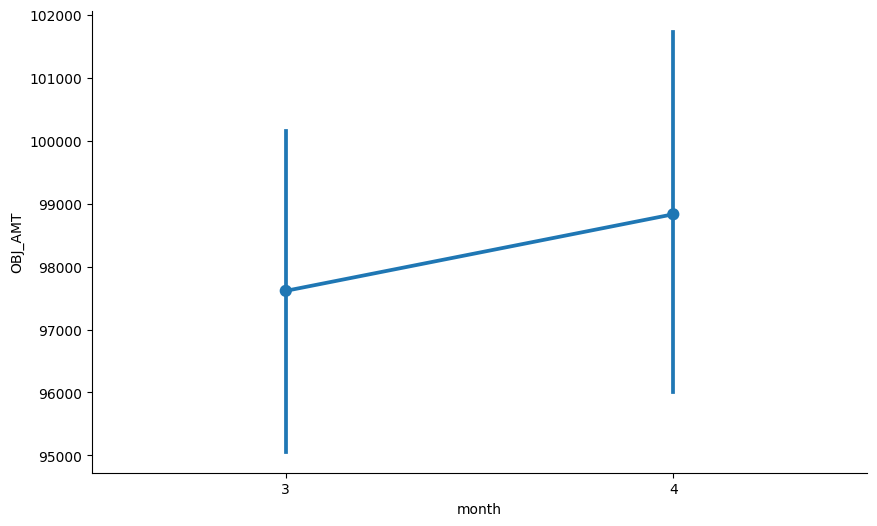

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(x = 'month', y = 'OBJ_AMT', data = apt_df)
sns.despine()

plt.savefig('output/stat01.png', dpi=200)
plt.show()

## 상관분석

In [37]:
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]
corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA']].reset_index(drop=True)
corr_df

,DEAL_YMD,OBJ_AMT,BLDG_AREA
0,2023-04-30,143000,84.60
1,2023-04-30,72500,59.98
2,2023-04-30,66579,42.29
3,2023-04-30,83300,59.79
4,2023-04-29,100000,84.47
...,...,...,...
5264,2023-03-01,56500,59.98
5265,2023-03-01,61000,84.92
5266,2023-03-01,155000,121.53
5267,2023-03-01,28000,14.97


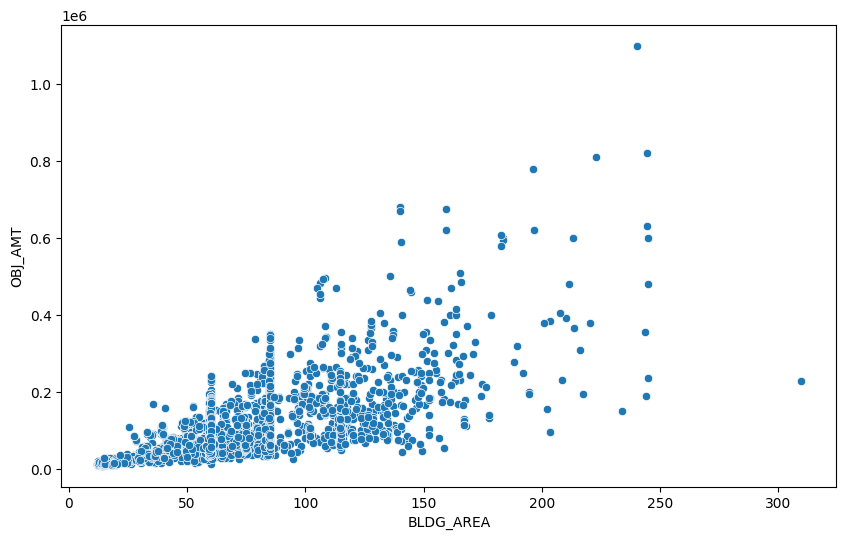

In [56]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]
corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = corr_df)
plt.savefig('output/stat02.png', dpi=200)
plt.show()

In [58]:
import pingouin as pg
pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,5269,0.651,"[0.63, 0.67]",0.0,inf,1.0


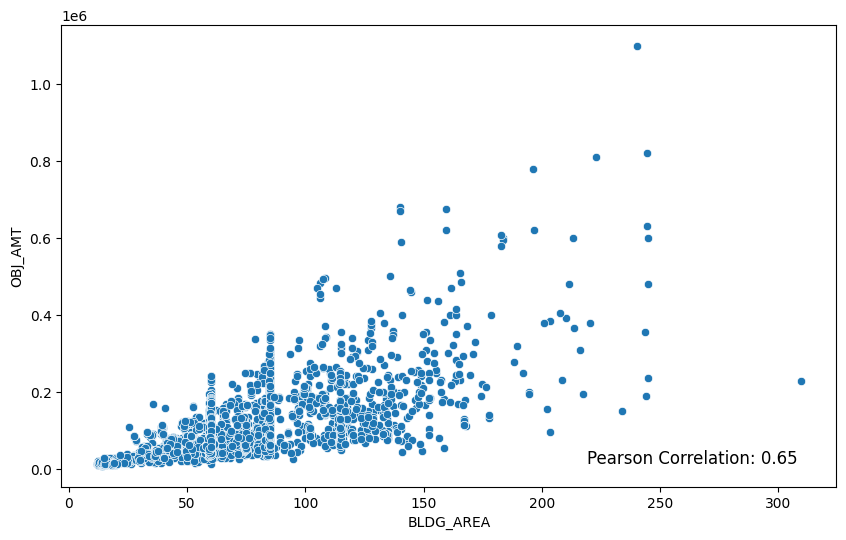

In [57]:
corr_coef = pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)['r'].values[0]

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = corr_df, ax=ax)
ax.text(0.95, 0.05, f'Pearson Correlation: {corr_coef:.2f}',
        transform=ax.transAxes, ha='right', fontsize=12)
plt.savefig('output/stat03.png', dpi=200)
plt.show()

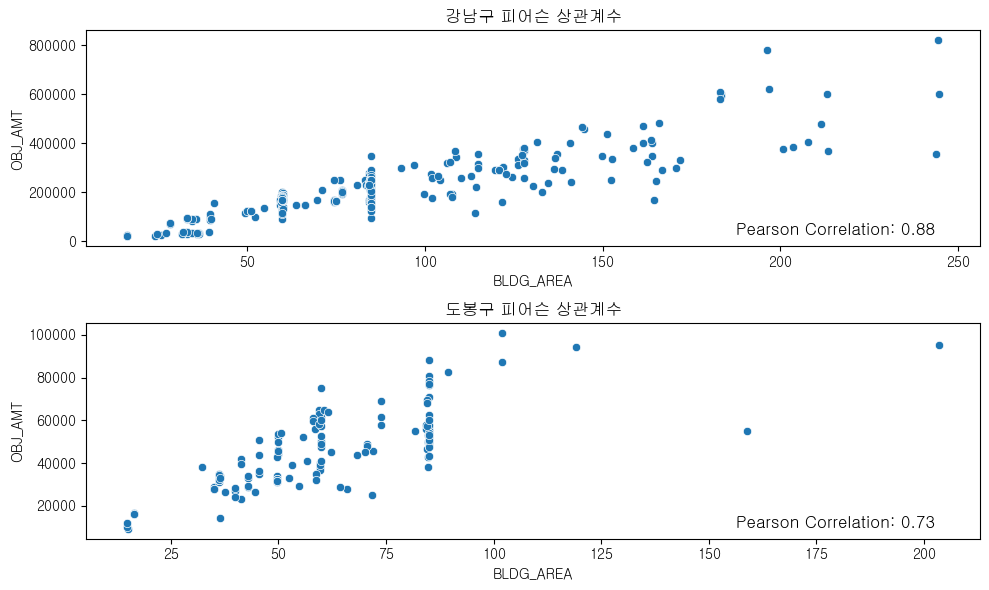

In [71]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sgg_nm = ['강남구', '도봉구']

fig, ax = plt.subplots(figsize=(10, 6), nrows = 2)
for i in range(len(sgg_nm)):
    sgg_df = corr_df[corr_df['SGG_NM'] == sgg_nm[i]]
    corr_coef = pg.corr(sgg_df['BLDG_AREA'], sgg_df['OBJ_AMT']).round(3)['r'].values[0]
    sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = sgg_df, ax=ax[i])
    ax[i].text(0.95, 0.05, f'Pearson Correlation: {corr_coef:.2f}',
            transform=ax[i].transAxes, ha='right', fontsize=12)
    ax[i].set_title(f'{sgg_nm[i]} 피어슨 상관계수')
plt.tight_layout()
plt.savefig('output/stat04.png', dpi=200)
plt.show()